In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [7]:
image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

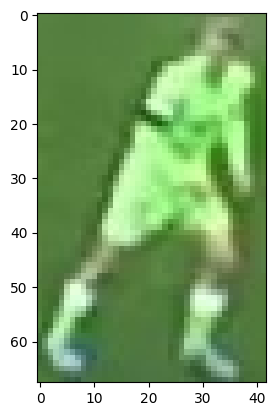

In [8]:
plt.imshow(image)
plt.show()

# Take the top half of the image

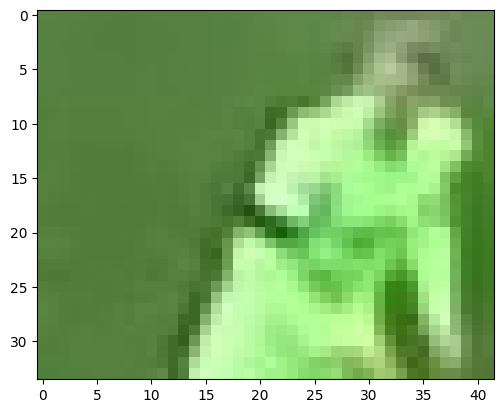

In [9]:
top_half_image = image[:int(image.shape[0]//2), :]
plt.imshow(top_half_image)
plt.show()

# Cluster the image into 2 clusters (Backgroud and T-shirt colours)

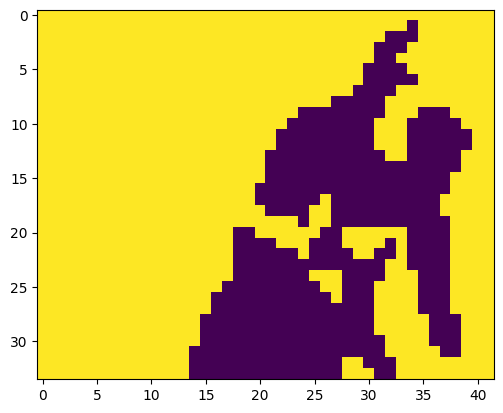

In [11]:
# Reshape image into a 2D array of pixels and 3 color values (RGB)
image_2d = top_half_image.reshape((-1, 3))

# Perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

# Get the cluster labels
labels = kmeans.labels_

# Reshape labels into original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [ ]:
corner_clusters = [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print("Non-player cluster:", non_player_cluster)

Non-player cluster: 1


In [14]:
player_cluster = 1 - non_player_cluster
print("Player cluster:", player_cluster)

Player cluster: 0


In [15]:
kmeans.cluster_centers_[player_cluster]

array([169.27315914, 233.41805226, 143.6888361 ])